In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
data = pd.read_excel('wildfires.xlsx')

In [3]:
data.head(20)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
5,yes,2008,30,67,0.0,22.71,7.97,6,6,14
6,yes,2013,32,52,0.0,30.98,11.86,7,6,14
7,yes,2009,29,72,0.0,38.66,14.31,8,6,17
8,no,2014,26,89,0.2,39.62,10.76,9,6,15
9,no,2007,28,77,0.0,46.44,13.14,10,6,13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           204 non-null    object 
 1   year           204 non-null    int64  
 2   temp           204 non-null    int64  
 3   humidity       204 non-null    int64  
 4   rainfall       204 non-null    float64
 5   drought_code   204 non-null    float64
 6   buildup_index  204 non-null    float64
 7   day            204 non-null    int64  
 8   month          204 non-null    int64  
 9   wind_speed     204 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.1+ KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
data['fire_type'] = pd.factorize(data['fire'])[0]

In [8]:
data.head(10)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed,fire_type
0,no,2015,28,59,0.0,8.06,3.47,1,6,19,0
1,no,2010,30,61,1.3,8.17,4.03,2,6,13,0
2,no,2009,26,83,13.1,8.08,3.59,3,6,22,0
3,no,2017,25,87,2.5,7.18,2.42,4,6,15,0
4,no,2014,28,77,0.0,14.98,4.63,5,6,18,0
5,yes,2008,30,67,0.0,22.71,7.97,6,6,14,1
6,yes,2013,32,52,0.0,30.98,11.86,7,6,14,1
7,yes,2009,29,72,0.0,38.66,14.31,8,6,17,1
8,no,2014,26,89,0.2,39.62,10.76,9,6,15,0
9,no,2007,28,77,0.0,46.44,13.14,10,6,13,0


In [9]:
X = data.drop(['fire','fire_type'],axis = 1)
X

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,2015,28,59,0.0,8.06,3.47,1,6,19
1,2010,30,61,1.3,8.17,4.03,2,6,13
2,2009,26,83,13.1,8.08,3.59,3,6,22
3,2017,25,87,2.5,7.18,2.42,4,6,15
4,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...
199,2017,31,67,0.0,45.15,17.89,26,9,15
200,2017,29,89,4.4,8.74,6.52,27,9,15
201,2009,27,88,0.5,8.87,3.71,28,9,30
202,2016,25,56,0.1,15.54,6.10,29,9,20


In [10]:
y = data['fire_type']
y.value_counts()

1    107
0     97
Name: fire_type, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
class MultiLayerPerceptron():

    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):
       
        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i in range(len(self.weights)):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, self.weights[i])

            # apply sigmoid activation function
            activations = self.sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations

    def back_propagate(self, error):
        
        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self.sigmoid_derivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)

    #Gradient Descent, used for calculating weights by multiplying derivatives and
    def gradient_descent(self, learningRate=1):
        
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate
        
    def classifier(self, x):
        if x <= 0.5:
            return 0
        else:
            return 1

    #sigmoid function
    def sigmoid(self, x):
        return (1.0 / (1.0 + np.exp(-x)))   #Reference: https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python


    def sigmoid_derivative(self, x):
        return x * (1.0 - x)


    def mse(self, target, output):
        return np.average((target - output) ** 2)
    

    def fit(self, inputs, targets, epochs, learning_rate):
        
        
        targets=targets.to_numpy()
        
        self.error_rate = []   
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self.mse(target, output)

            # Epoch complete, report the training error
            self.error_rate.append(sum_errors / len(inputs))
        
        return self

    def predict(self,new_data):
        self.result = []
        self.pred_proba = []
        temp = self.forward_propagate(new_data)
        

        for i in temp:
            for point in i:
                self.pred_proba.append(point)
                self.result.append(self.classifier(point))
        
        return np.array(self.result)

In [16]:
per = MultiLayerPerceptron(num_inputs = 9, hidden_layers = [3,3], num_outputs = 1)
mlp = MultiLayerPerceptron(num_inputs = 9, hidden_layers = [3,3], num_outputs = 1)

In [17]:
cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [18]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [19]:
scores = []
validate = 0
X_new = None
y_new = None        
for train, test in cv.split(X_train, y_train):
    per.fit(X_train[train], pd.DataFrame(y_train[train]), epochs = 1000, learning_rate = 0.1)
    score = accuracy_score(y_train[test], per.predict(X_train[test]))
    scores.append(score)
    for i in scores:
        if i > validate:
            validate = i
            X_new = X_train[train]
            y_new = pd.DataFrame(y_train[train])
mlp.fit(X_new, y_new, epochs = 1000, learning_rate = 0.1)

print(f"Scores: {scores}")
print(f"Best Score: {validate}")
print(f"Model Taken: {mlp}")


Scores: [0.7857142857142857, 0.9259259259259259, 0.9259259259259259, 0.9629629629629629, 0.9629629629629629]
Best Score: 0.9629629629629629
Model Taken: <__main__.MultiLayerPerceptron object at 0x00000142CBFA5AD0>


[]

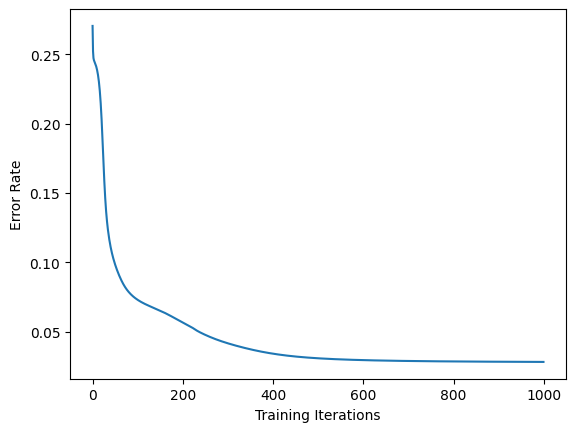

In [20]:
p = sns.lineplot(mlp.error_rate)
p.set_xlabel("Training Iterations")
p.set_ylabel("Error Rate")
p.plot()

In [21]:
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.pred_proba
print(y_pred)

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1]


In [22]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)} \n")

Accuracy Score: 0.8382352941176471 



In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.79      0.94      0.86        36

    accuracy                           0.84        68
   macro avg       0.86      0.83      0.83        68
weighted avg       0.85      0.84      0.84        68



<AxesSubplot: >

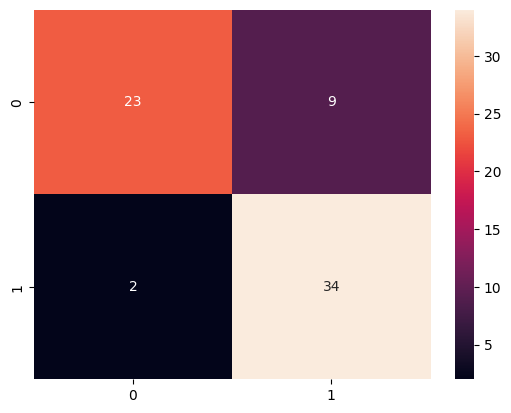

In [24]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

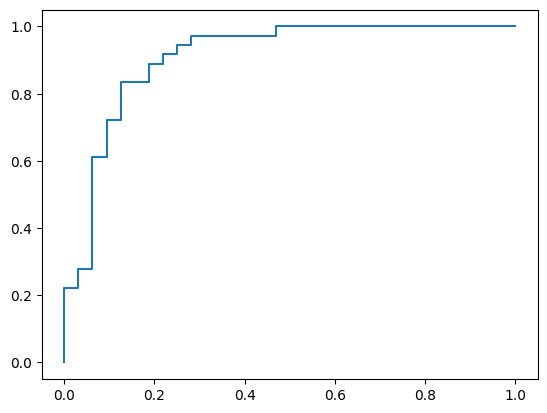

In [25]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)
plt.plot(false_positive_rate, true_positive_rate)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train, y_train)

LogisticRegression()

In [29]:
log_pred = log.predict(X_test)
print(log_pred)

[0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1]


In [30]:
print(f"Accuracy Score: {accuracy_score(y_test, log_pred)} \n")

Accuracy Score: 0.7794117647058824 



In [31]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.80      0.78      0.79        36

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



<AxesSubplot: >

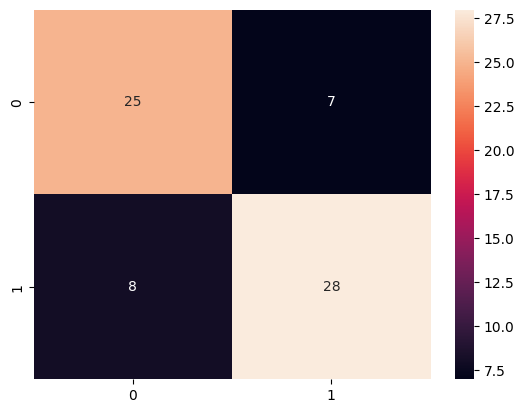

In [32]:
cf_matrix = confusion_matrix(y_test,log_pred)
sns.heatmap(cf_matrix, annot = True)

In [33]:
log_pred_proba = log.predict_proba(X_test)[:,1]

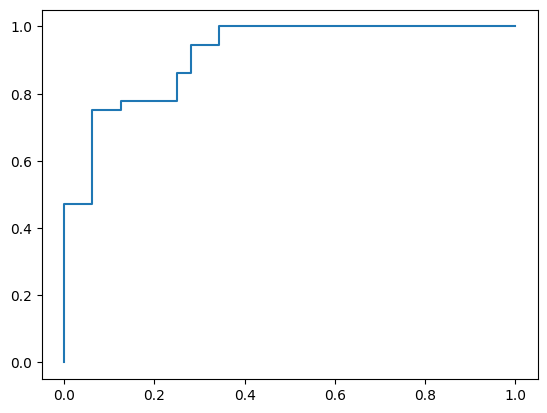

In [34]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, log_pred_proba)
plt.plot(false_positive_rate, true_positive_rate)